In [ ]:
#Use the mid-level API to prepare the data in DataLoaders on your own datasets. Try this with the Pet dataset and the Adult dataset from Chapter 1.

In [1]:
import fastbook
fastbook.setup_book()

In [10]:
from fastai2.tabular.all import *
from utils import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/home/jayajasodani_gmail_com/.fastai/data/adult_sample/export.pkl'),Path('/home/jayajasodani_gmail_com/.fastai/data/adult_sample/models'),Path('/home/jayajasodani_gmail_com/.fastai/data/adult_sample/adult.csv')]

In [4]:
df=pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [16]:
cat_names=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
cont_names=['age','education-num','fnlwgt','capital-gain','capital-loss','hours-per-week']

In [20]:
procs = [Categorify, FillMissing, Normalize]

In [28]:
splits = RandomSplitter()(range_of(df))

In [29]:
to = TabularPandas(df, procs, cat_names, cont_names,y_names='salary',splits=splits)

In [30]:
dls=to.dataloaders()

In [32]:
#dls.show_batch()

In [33]:
learn = tabular_learner(dls,metrics=accuracy)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.005248074419796467)

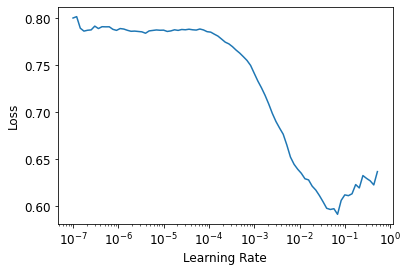

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(4,1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.688694,0.664231,0.630221,00:06
1,0.528117,0.514562,0.780405,00:06
2,0.457433,0.464729,0.799294,00:06
3,0.452132,0.452485,0.802979,00:06


In [36]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,education-num,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,salary_pred
0,5.0,16.0,3.0,2.0,1.0,5.0,2.0,27.0,1.0,0.617761,-0.033527,2.257188,-0.146237,-0.215866,0.371755,0.0,0.0
1,2.0,12.0,3.0,11.0,1.0,5.0,2.0,40.0,1.0,1.861353,-0.426578,-0.263139,-0.146237,-0.215866,-2.637042,0.0,1.0
2,6.0,15.0,3.0,11.0,1.0,5.0,2.0,40.0,1.0,0.764066,1.931724,0.381475,13.261686,-0.215866,-0.278795,1.0,1.0
3,7.0,12.0,3.0,5.0,1.0,5.0,2.0,40.0,1.0,0.764066,-0.426578,-1.341419,-0.146237,-0.215866,0.371755,0.0,1.0
4,5.0,12.0,7.0,5.0,2.0,5.0,1.0,40.0,1.0,1.641895,-0.426578,-0.258329,-0.146237,-0.215866,-0.034839,0.0,0.0
5,2.0,12.0,3.0,2.0,1.0,3.0,2.0,40.0,1.0,1.056676,-0.426578,0.778894,-0.146237,4.679863,-0.034839,1.0,1.0
6,5.0,8.0,6.0,9.0,2.0,3.0,1.0,40.0,1.0,0.910371,0.752573,-0.773547,-0.146237,-0.215866,-0.034839,0.0,0.0
7,1.0,9.0,7.0,1.0,2.0,5.0,1.0,40.0,1.0,2.446572,0.359523,0.452694,-0.146237,-0.215866,-0.848027,0.0,0.0
8,5.0,12.0,5.0,9.0,4.0,5.0,2.0,40.0,1.0,-1.137897,-0.426578,-0.090833,-0.146237,-0.215866,-0.034839,0.0,0.0
